In [1]:
import os
import networkx as nx
import datetime
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import cupy as cp

In [2]:
#!pip install cugraph
# import cugraph as cnx

In [3]:
path = "graphs/nodes_hashtag/"
MANIFESTACION = "nat"
    

In [6]:
def calc_nestedness(G):
    matrix = nx.to_numpy_array(G)
    rows, cols = matrix.shape

    posiciones_1 = np.array([np.where(matrix[i] == 1)[0] for i in range(rows)])

    ones_rows = np.sum(matrix == 1, axis=1)
    ones_rows = np.sum(matrix == 1, axis=0)
    cum_n_ij = 0
    # NODF por filas
    for i in tqdm(range(rows)):
        for j in range(i+1, rows):
            if ones_rows[i] < ones_rows[j]:
                # df = 100
                continue
            else:
                # df = 0
                # Calculo PO
                
                # Identificar las posiciones de los unos en la fila i y j
                posiciones_1_i = posiciones_1[i]
                posiciones_1_j = posiciones_1[j]
                
                # Contar cuántas posiciones de unos en j coinciden con las de i
                coincidencias = np.in1d(posiciones_1_j, posiciones_1_i).sum()      

                # Calcular el porcentaje de coincidencias, PO
                n_ij = (coincidencias / len(posiciones_1_j)) * 100 if len(posiciones_1_j) > 0 else 0
                cum_n_ij += n_ij  

        # NODF por columnas
    

    mod_rows = (rows*(rows-1))/2
    mod_cols = (cols*(cols-1))/2
    den = mod_rows + mod_cols
    nodf = cum_n_ij/den
    return nodf

In [7]:
direct = path + MANIFESTACION + '/'
arr_clust = []
arr_hour = []
arr_mod = []
arr_nest = []
for root, dirs, files in os.walk(direct, topdown=False):
   for name in tqdm(files):
      if name.endswith(".gexf"):
            print("Analizando grafo", name[:-5])
            G = nx.read_gexf(direct + name)
            nestedness = calc_nestedness(G)
            arr_nest.append(nestedness)
            avg_clust=nx.average_clustering(G)
            arr_clust.append(avg_clust)
            arr_hour.append(name[:-5])
            modularity_louv = nx.community.modularity(G, nx.community.louvain_communities(G, seed=123))
            arr_mod.append(modularity_louv)
            
            #print("Analizado grafo", name[:-5], "coef_avg_clust:", round(avg_clust, 6), "coef_mod:", round(modularity_louv, 6))

  0%|          | 0/520 [00:00<?, ?it/s]

Analizando grafo 429531


  0%|          | 0/520 [00:33<?, ?it/s]


KeyboardInterrupt: 

In [69]:
data = list(zip(arr_hour, arr_clust, arr_mod))
data.sort()
hour_sort, clust_sort, mod_sort = zip(*data)
hour_sort = list(hour_sort)
clust_sort = list(clust_sort)
mod_sort = list(mod_sort)

In [70]:
dt_sort_arr=[]
for hour in hour_sort:
    dt_sort_arr.append(datetime.datetime.fromtimestamp(int(hour)*3600))
print(MANIFESTACION, ", hora con avg_clust max", dt_sort_arr[clust_sort.index(max(clust_sort))], "hour_name:", hour_sort[clust_sort.index(max(clust_sort))])
print(MANIFESTACION, ", hora con avg_clust min", dt_sort_arr[clust_sort.index(min(clust_sort))], "hour_name:", hour_sort[clust_sort.index(min(clust_sort))])

print(MANIFESTACION, ", hora con modularity max", dt_sort_arr[mod_sort.index(max(mod_sort))], "hour_name:", hour_sort[mod_sort.index(max(mod_sort))])
print(MANIFESTACION, ", hora con modularity min", dt_sort_arr[mod_sort.index(min(mod_sort))], "hour_name:", hour_sort[mod_sort.index(min(mod_sort))])

9n , hora con avg_clust max 2019-11-10 01:00:00 hour_name: 437040
9n , hora con avg_clust min 2019-11-10 04:00:00 hour_name: 437043
9n , hora con modularity max 2019-11-08 15:00:00 hour_name: 437006
9n , hora con modularity min 2019-11-09 21:00:00 hour_name: 437036


['436983', '436984', '436985', '436986', '436987', '436988', '436989', '436990', '436991', '436992', '436993', '436994', '436995', '436996', '436997', '436998', '436999', '437000', '437001', '437002', '437003', '437004', '437005', '437006', '437007', '437008', '437009', '437010', '437011', '437012', '437013', '437014', '437015', '437016', '437017', '437018', '437019', '437020', '437021', '437022', '437023', '437024', '437025', '437026', '437027', '437028', '437029', '437030', '437031', '437032', '437033', '437034', '437035', '437036', '437037', '437038', '437039', '437040', '437041', '437042', '437043', '437044', '437045', '437046', '437047', '437048', '437049', '437050', '437051', '437052', '437053', '437054', '437055', '437056', '437057', '437058', '437059', '437060', '437061', '437062', '437063', '437064', '437065', '437066', '437067', '437068', '437069', '437070', '437071', '437072', '437073', '437074', '437075', '437076', '437077', '437078', '437079']
Fecha identificada en paper p

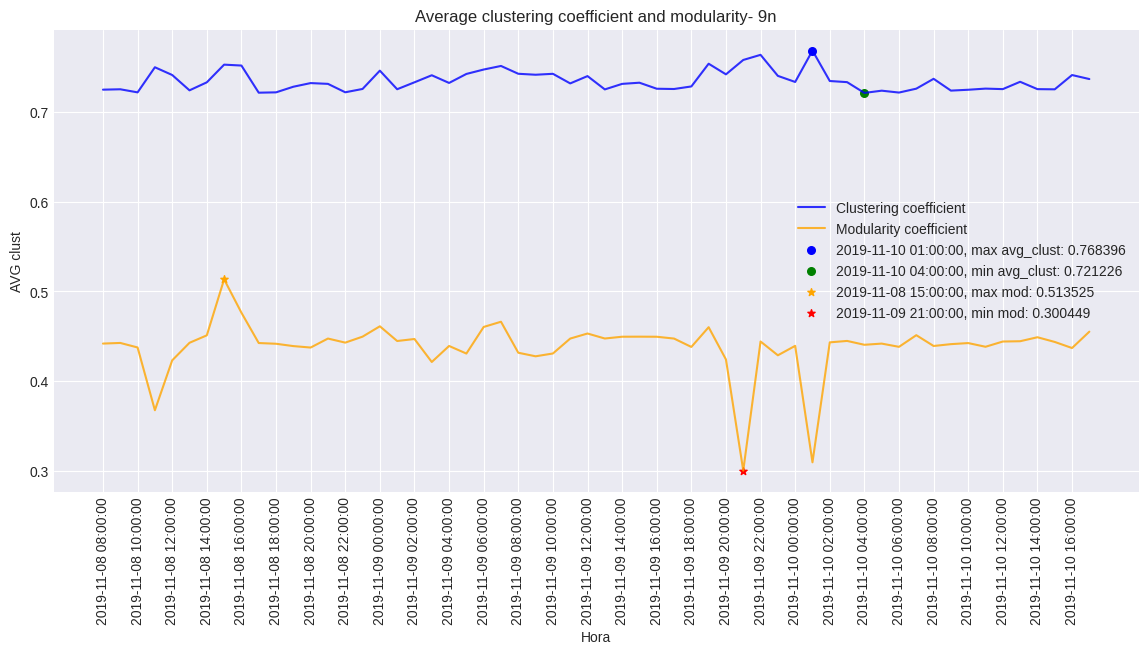

In [93]:
print(hour_sort)
if MANIFESTACION == "9n":
        fecha=str(int(437038))
        index_fecha=hour_sort.index(fecha)
        init=str(int(1573196400/3600))
        index_init=hour_sort.index(init)
        end=str(int(1573405200/3600))
        index_end=hour_sort.index(end)
else:
        fecha=str(int(429624))
        index_fecha=hour_sort.index(fecha)
        init=str(int(1546297200/3600))
        index_init=hour_sort.index(init)
        end=str(int(1546902000/3600))
        index_end=hour_sort.index(end)
print("Fecha identificada en paper para", MANIFESTACION, datetime.datetime.fromtimestamp(int(fecha)*3600))
print("Fecha inicial en paper", dt_sort_arr[index_init], ", fecha final en paper", dt_sort_arr[index_end])
plt.figure(figsize=(14,6)) 
plt.style.use('seaborn-v0_8-darkgrid')    



plt.plot(dt_sort_arr[index_init:index_end], clust_sort[index_init:index_end], alpha=0.8, c="blue", label="Clustering coefficient")
plt.plot(dt_sort_arr[index_init:index_end], mod_sort[index_init:index_end], alpha=0.8, c="orange", label="Modularity coefficient")

name_max_clust = str(dt_sort_arr[index_init:index_end][clust_sort[index_init:index_end].index(max(clust_sort[index_init:index_end]))]) + ", max avg_clust: " + str(round(max(clust_sort[index_init:index_end]), 6))
name_min_clust  = str(dt_sort_arr[index_init:index_end][clust_sort[index_init:index_end].index(min(clust_sort[index_init:index_end]))]) + ", min avg_clust: " + str(round(min(clust_sort[index_init:index_end]), 6))
plt.scatter(dt_sort_arr[index_init:index_end][clust_sort[index_init:index_end].index(max(clust_sort[index_init:index_end]))], max(clust_sort[index_init:index_end]), s=30, c="blue", marker="o", label = name_max_clust)
plt.scatter(dt_sort_arr[index_init:index_end][clust_sort[index_init:index_end].index(min(clust_sort[index_init:index_end]))], min(clust_sort[index_init:index_end]), s=30, c="green", marker="o", label = name_min_clust)

name_max_mod = str(dt_sort_arr[index_init:index_end][mod_sort[index_init:index_end].index(max(mod_sort[index_init:index_end]))]) + ", max mod: " + str(round(max(mod_sort[index_init:index_end]), 6))
name_min_mod  = str(dt_sort_arr[index_init:index_end][mod_sort[index_init:index_end].index(min(mod_sort[index_init:index_end]))]) + ", min mod: " + str(round(min(mod_sort[index_init:index_end]), 6))
plt.scatter(dt_sort_arr[index_init:index_end][mod_sort[index_init:index_end].index(max(mod_sort[index_init:index_end]))], max(mod_sort[index_init:index_end]), s=30, c="orange", marker="*", label = name_max_mod)
plt.scatter(dt_sort_arr[index_init:index_end][mod_sort[index_init:index_end].index(min(mod_sort[index_init:index_end]))], min(mod_sort[index_init:index_end]), s=30, c="red", marker="*", label = name_min_mod)
        #plt.plot(points[0], points[1], alpha=alpha, label="K_T = " + str(arr_kt_plot[index]))
plt.xlabel("Hora")
plt.ylabel("AVG clust")
plt.xticks(dt_sort_arr[index_init:index_end][::2], labels=dt_sort_arr[index_init:index_end][::2])
plt.xticks(rotation=90)
plt.title("Average clustering coefficient and modularity- " + MANIFESTACION)
plt.legend()

plt.savefig("paper_avg_clust_mod_" + MANIFESTACION)

plt.show()


In [91]:
dt_sort_arr[index_init]

datetime.datetime(2019, 11, 8, 8, 0)